<a href="https://colab.research.google.com/github/roehrs/Bootcamp_programador_python_IGTI/blob/main/algoritmo_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # função para normalização do dataset
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
from sklearn.metrics import classification_report, confusion_matrix #importação para construção de matrix 
from mlxtend.plotting import plot_confusion_matrix # importação para plot de matrix confusão
import matplotlib.pyplot as plt

In [ ]:
#importando csv 
df_diabetes = pd.read_csv('datasets_diabetes.csv')

In [ ]:
#transforma os dados em array
entradas = df_diabetes.iloc[:, :-1].values  #dados de entrada
saida = df_diabetes.iloc[:, 8].values  # saídas ou target

In [ ]:
# realiza o processo de normalização dos dados
normaliza = MinMaxScaler() #objeto para a normalização
entradas_normalizadas=normaliza.fit_transform(entradas)

In [ ]:
# realiza a visisão dos dados entre treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, 
                                                    test_size=0.30,random_state=42)

In [ ]:
#cria o objeto SVM
clf = SVC(gamma='auto',random_state=1)

In [ ]:
#realiza a classificação via SVM
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[136  15]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       151
           1       0.74      0.53      0.61        80

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



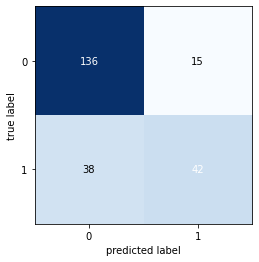

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()